<a href="https://colab.research.google.com/github/pri538/NP-Projects/blob/main/Chem_Phy_Bio_Classification_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
import re
import string
string.punctuation
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn import metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.2 MB/s eta 0:00:00


In [ ]:
!pip install unidecode
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
import nltk
nltk.download("all")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.0 MB/s eta 0:00:00
unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, auc, roc_curve,precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer,WordNetLemmatizer,PorterStemmer,RegexpStemmer,SnowballStemmer
from nltk.util import ngrams
from contractions import fix
from unidecode import unidecode
from string import punctuation

from wordcloud import WordCloud

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Input,Embedding
from keras.models import Sequential

from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
txt = pd.read_csv('/content/train.csv')

In [ ]:
test = pd.read_csv("/content/test.csv")
test

,Id,Comment,Topic
0,0x1aa9,Personally I have no idea what my IQ is. I’ve ...,Biology
1,0x25e,I'm skeptical. A heavier lid would be needed t...,Physics
2,0x1248,I think I have 100 cm of books on the subject....,Biology
3,0x2b9,Is chemistry hard in uni. Ive read somewhere t...,Chemistry
4,0x24af,"In addition to the other comment, you can crit...",Physics
...,...,...,...
1581,0x22bf,I’m not really denying your intent. I’m a) dou...,Chemistry
1582,0x1f4a,i really empathize with your compassion for bu...,Biology
1583,0x27b7,"If you want to keep it for more than 2 weeks, ...",Chemistry
1584,0x2066,Same here. I’m in nursing school so I only hav...,Biology


In [ ]:
df = pd.concat([txt,test],axis=0)
df

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry
...,...,...,...
1581,0x22bf,I’m not really denying your intent. I’m a) dou...,Chemistry
1582,0x1f4a,i really empathize with your compassion for bu...,Biology
1583,0x27b7,"If you want to keep it for more than 2 weeks, ...",Chemistry
1584,0x2066,Same here. I’m in nursing school so I only hav...,Biology


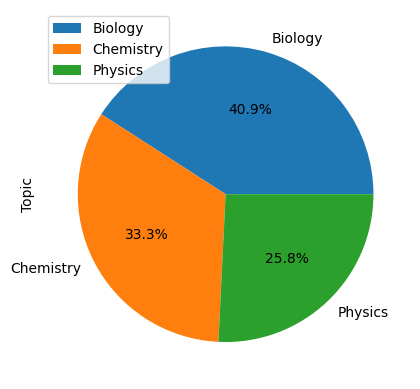

In [ ]:
# Plotting pie chart for Topic value counts
df.Topic.value_counts().plot(kind="pie", autopct="%.1f%%")
plt.legend()
plt.show()


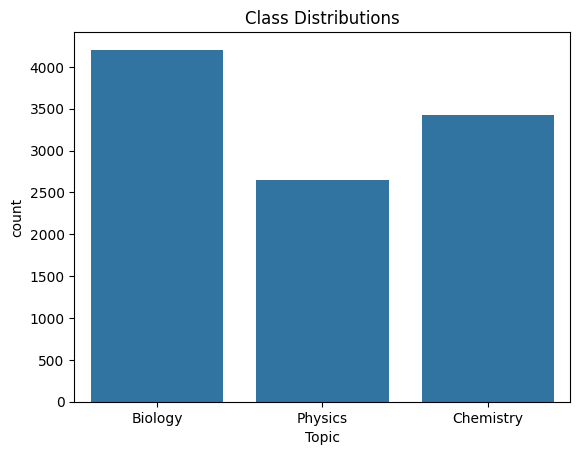

In [ ]:
sns.countplot(x=df['Topic'])
plt.title("Class Distributions")
plt.show()

In [ ]:
df['Topic'] = df['Topic'].replace({'Physics':0,'Chemistry':1,'Biology':2})
df['Topic'].value_counts()

2    4205
1    3426
0    2650
Name: Topic, dtype: int64

In [ ]:
df.iloc[10,1:2]

Comment     Is H2S what produced when the egg protein is ...
Name: 10, dtype: object

In [ ]:
txt.shape

(8695, 3)

In [ ]:
txt.head()

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry


In [ ]:
#selection data
df1 = txt[['Comment']]
df1.head()

,Comment
0,A few things. You might have negative- frequen...
1,Is it so hard to believe that there exist part...
2,There are bees
3,I'm a medication technician. And that's alot o...
4,Cesium is such a pretty metal.


In [ ]:
#defining the function to remove emoji
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', string)

#applying the function
df1['No_Emoji'] = df1['Comment'].apply(lambda x: remove_emoji(x))
df1.head()

<ipython-input-58-c4fa02673887>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['No_Emoji'] = df1['Comment'].apply(lambda x: remove_emoji(x))


,Comment,No_Emoji
0,A few things. You might have negative- frequen...,A few things. You might have negative- frequen...
1,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...
2,There are bees,There are bees
3,I'm a medication technician. And that's alot o...,I'm a medication technician. And that's alot o...
4,Cesium is such a pretty metal.,Cesium is such a pretty metal.


In [ ]:
#defining to remove punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

df1["Comment_Punctuation"] = df1["No_Emoji"].apply(lambda text: remove_punctuation(text))
df1.head()

,Comment,No_Emoji,Comment_Punctuation
0,A few things. You might have negative- frequen...,A few things. You might have negative- frequen...,A few things You might have negative frequency...
1,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...
2,There are bees,There are bees,There are bees
3,I'm a medication technician. And that's alot o...,I'm a medication technician. And that's alot o...,Im a medication technician And thats alot of d...
4,Cesium is such a pretty metal.,Cesium is such a pretty metal.,Cesium is such a pretty metal


In [ ]:
def remove_html(text):
    html_pattern = re.compile(r'https?://\S+|www\.\S+')
    return html_pattern.sub(r'', text)

#applying function to the column
df1['Comment_Clean'] = df1['Comment_Punctuation'].apply(lambda x: remove_html(x))
df1.head()

,Comment,No_Emoji,Comment_Punctuation,Comment_Clean
0,A few things. You might have negative- frequen...,A few things. You might have negative- frequen...,A few things You might have negative frequency...,A few things You might have negative frequency...
1,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...
2,There are bees,There are bees,There are bees,There are bees
3,I'm a medication technician. And that's alot o...,I'm a medication technician. And that's alot o...,Im a medication technician And thats alot of d...,Im a medication technician And thats alot of d...
4,Cesium is such a pretty metal.,Cesium is such a pretty metal.,Cesium is such a pretty metal,Cesium is such a pretty metal


In [ ]:
#setting lower case
df1["Comment_Lower"] = df1["Comment_Clean"].str.lower()
df1.head()

,Comment,No_Emoji,Comment_Punctuation,Comment_Clean,Comment_Lower
0,A few things. You might have negative- frequen...,A few things. You might have negative- frequen...,A few things You might have negative frequency...,A few things You might have negative frequency...,a few things you might have negative frequency...
1,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,is it so hard to believe that there exist part...
2,There are bees,There are bees,There are bees,There are bees,there are bees
3,I'm a medication technician. And that's alot o...,I'm a medication technician. And that's alot o...,Im a medication technician And thats alot of d...,Im a medication technician And thats alot of d...,im a medication technician and thats alot of d...
4,Cesium is such a pretty metal.,Cesium is such a pretty metal.,Cesium is such a pretty metal,Cesium is such a pretty metal,cesium is such a pretty metal


In [ ]:
#defining function for tokenization
def tokenization(text):
    tokens = re.split('W+', text)
    return tokens

#applying function to the column
df1['Comment_Tokenied'] = df1['Comment_Lower'].apply(lambda x: tokenization(x))
df1.head()

,Comment,No_Emoji,Comment_Punctuation,Comment_Clean,Comment_Lower,Comment_Tokenied
0,A few things. You might have negative- frequen...,A few things. You might have negative- frequen...,A few things You might have negative frequency...,A few things You might have negative frequency...,a few things you might have negative frequency...,[a few things you might have negative frequenc...
1,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,is it so hard to believe that there exist part...,[is it so hard to believe that there exist par...
2,There are bees,There are bees,There are bees,There are bees,there are bees,[there are bees]
3,I'm a medication technician. And that's alot o...,I'm a medication technician. And that's alot o...,Im a medication technician And thats alot of d...,Im a medication technician And thats alot of d...,im a medication technician and thats alot of d...,[im a medication technician and thats alot of ...
4,Cesium is such a pretty metal.,Cesium is such a pretty metal.,Cesium is such a pretty metal,Cesium is such a pretty metal,cesium is such a pretty metal,[cesium is such a pretty metal]


In [ ]:
#stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
df1['No_Stopwords'] = df1['Comment_Tokenied'].apply(lambda x:remove_stopwords(x))
df1.head()

,Comment,No_Emoji,Comment_Punctuation,Comment_Clean,Comment_Lower,Comment_Tokenied,No_Stopwords
0,A few things. You might have negative- frequen...,A few things. You might have negative- frequen...,A few things You might have negative frequency...,A few things You might have negative frequency...,a few things you might have negative frequency...,[a few things you might have negative frequenc...,[a few things you might have negative frequenc...
1,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,is it so hard to believe that there exist part...,[is it so hard to believe that there exist par...,[is it so hard to believe that there exist par...
2,There are bees,There are bees,There are bees,There are bees,there are bees,[there are bees],[there are bees]
3,I'm a medication technician. And that's alot o...,I'm a medication technician. And that's alot o...,Im a medication technician And thats alot of d...,Im a medication technician And thats alot of d...,im a medication technician and thats alot of d...,[im a medication technician and thats alot of ...,[im a medication technician and thats alot of ...
4,Cesium is such a pretty metal.,Cesium is such a pretty metal.,Cesium is such a pretty metal,Cesium is such a pretty metal,cesium is such a pretty metal,[cesium is such a pretty metal],[cesium is such a pretty metal]


In [ ]:
#defining the object for stemming
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

#applying the function
df1['Comment_Stemmed'] = df1['No_Stopwords'].apply(lambda x: stemming(x))
df1.head()

,Comment,No_Emoji,Comment_Punctuation,Comment_Clean,Comment_Lower,Comment_Tokenied,No_Stopwords,Comment_Stemmed
0,A few things. You might have negative- frequen...,A few things. You might have negative- frequen...,A few things You might have negative frequency...,A few things You might have negative frequency...,a few things you might have negative frequency...,[a few things you might have negative frequenc...,[a few things you might have negative frequenc...,[a few things you might have negative frequenc...
1,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,is it so hard to believe that there exist part...,[is it so hard to believe that there exist par...,[is it so hard to believe that there exist par...,[is it so hard to believe that there exist par...
2,There are bees,There are bees,There are bees,There are bees,there are bees,[there are bees],[there are bees],[there are be]
3,I'm a medication technician. And that's alot o...,I'm a medication technician. And that's alot o...,Im a medication technician And thats alot of d...,Im a medication technician And thats alot of d...,im a medication technician and thats alot of d...,[im a medication technician and thats alot of ...,[im a medication technician and thats alot of ...,[im a medication technician and thats alot of ...
4,Cesium is such a pretty metal.,Cesium is such a pretty metal.,Cesium is such a pretty metal,Cesium is such a pretty metal,cesium is such a pretty metal,[cesium is such a pretty metal],[cesium is such a pretty metal],[cesium is such a pretty met]


In [ ]:
#defining the object for lemmatizing
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
#defining a function for lemmatizing
def lemmatize_words(text):
    lemma_text = [lemmatizer.lemmatize(word) for word in text]
    return lemma_text

#applying the function
df1["Comment_lemmatized"] = df1["Comment_Stemmed"].apply(lambda text: lemmatize_words(text))
df1.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Comment,No_Emoji,Comment_Punctuation,Comment_Clean,Comment_Lower,Comment_Tokenied,No_Stopwords,Comment_Stemmed,Comment_lemmatized
0,A few things. You might have negative- frequen...,A few things. You might have negative- frequen...,A few things You might have negative frequency...,A few things You might have negative frequency...,a few things you might have negative frequency...,[a few things you might have negative frequenc...,[a few things you might have negative frequenc...,[a few things you might have negative frequenc...,[a few things you might have negative frequenc...
1,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,Is it so hard to believe that there exist part...,is it so hard to believe that there exist part...,[is it so hard to believe that there exist par...,[is it so hard to believe that there exist par...,[is it so hard to believe that there exist par...,[is it so hard to believe that there exist par...
2,There are bees,There are bees,There are bees,There are bees,there are bees,[there are bees],[there are bees],[there are be],[there are be]
3,I'm a medication technician. And that's alot o...,I'm a medication technician. And that's alot o...,Im a medication technician And thats alot of d...,Im a medication technician And thats alot of d...,im a medication technician and thats alot of d...,[im a medication technician and thats alot of ...,[im a medication technician and thats alot of ...,[im a medication technician and thats alot of ...,[im a medication technician and thats alot of ...
4,Cesium is such a pretty metal.,Cesium is such a pretty metal.,Cesium is such a pretty metal,Cesium is such a pretty metal,cesium is such a pretty metal,[cesium is such a pretty metal],[cesium is such a pretty metal],[cesium is such a pretty met],[cesium is such a pretty met]


In [ ]:
#selection data
df2 = df1[['Comment_Clean']]
df2.head()

,Comment_Clean
0,A few things You might have negative frequency...
1,Is it so hard to believe that there exist part...
2,There are bees
3,Im a medication technician And thats alot of d...
4,Cesium is such a pretty metal


In [ ]:
#create function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#apply function to data
df2['Subjectivity'] = df2['Comment_Clean'].apply(getSubjectivity)
df2['Polarity'] = df2['Comment_Clean'].apply(getPolarity)
df2.head()

<ipython-input-67-8cf82aabb800>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Subjectivity'] = df2['Comment_Clean'].apply(getSubjectivity)
<ipython-input-67-8cf82aabb800>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Polarity'] = df2['Comment_Clean'].apply(getPolarity)


,Comment_Clean,Subjectivity,Polarity
0,A few things You might have negative frequency...,0.493155,0.102712
1,Is it so hard to believe that there exist part...,0.543056,-0.218056
2,There are bees,0.000000,0.000000
3,Im a medication technician And thats alot of d...,0.550000,0.033333
4,Cesium is such a pretty metal,0.750000,0.125000


In [ ]:
#create function to get sentiment data
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

#apply function to data
df2['Sentiment'] = df2['Polarity'].apply(getSentiment)
df2.head()

<ipython-input-68-628ec5bbd516>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sentiment'] = df2['Polarity'].apply(getSentiment)


,Comment_Clean,Subjectivity,Polarity,Sentiment
0,A few things You might have negative frequency...,0.493155,0.102712,Positive
1,Is it so hard to believe that there exist part...,0.543056,-0.218056,Negative
2,There are bees,0.000000,0.000000,Neutral
3,Im a medication technician And thats alot of d...,0.550000,0.033333,Positive
4,Cesium is such a pretty metal,0.750000,0.125000,Positive


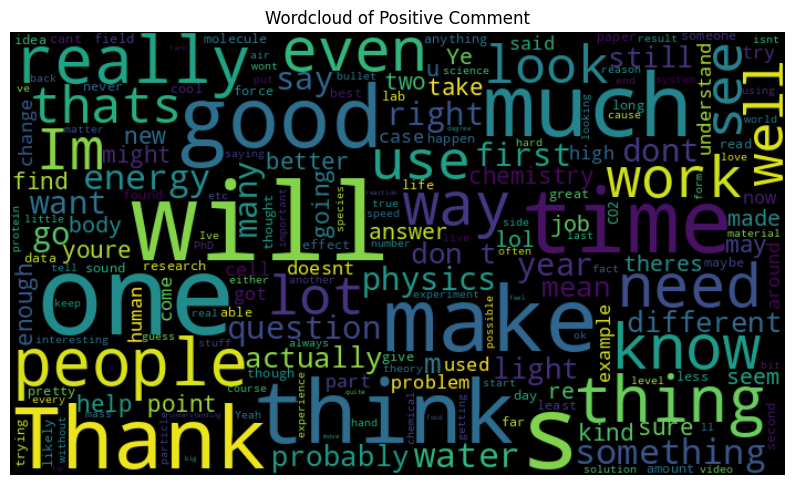

In [ ]:
positive = " ".join(df2[df2.Sentiment == 'Positive']['Comment_Clean'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100).generate(positive)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Positive Comment")
plt.axis('off')
plt.show()

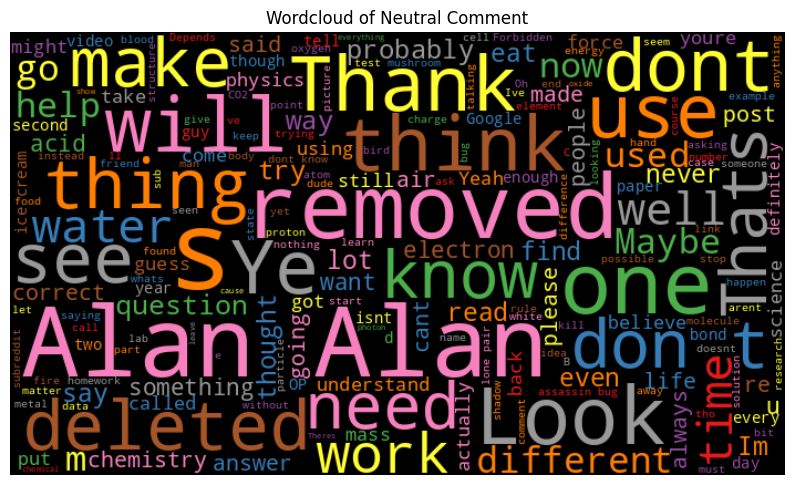

In [ ]:
neutral = " ".join(df2[df2.Sentiment == 'Neutral']['Comment_Clean'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, colormap = 'Set1').generate(neutral)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Neutral Comment")
plt.axis('off')
plt.show()

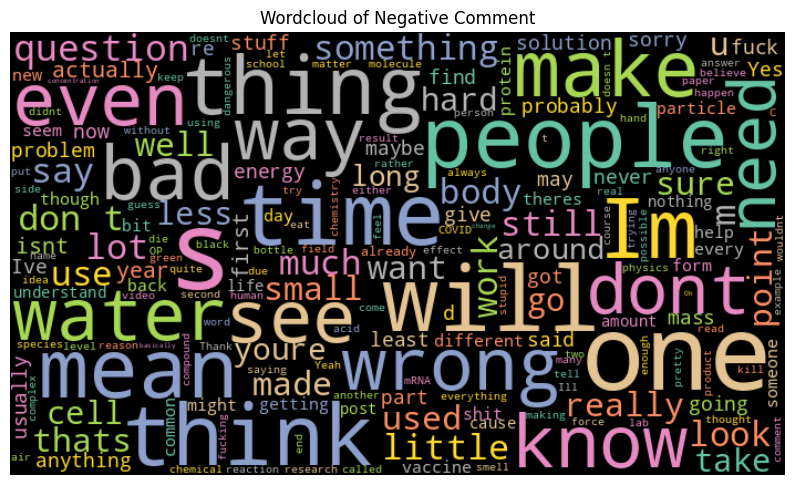

In [ ]:
negative = " ".join(df2[df2.Sentiment == 'Negative']['Comment_Clean'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, colormap = 'Set2').generate(negative)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Negative Comment")
plt.axis('off')
plt.show()

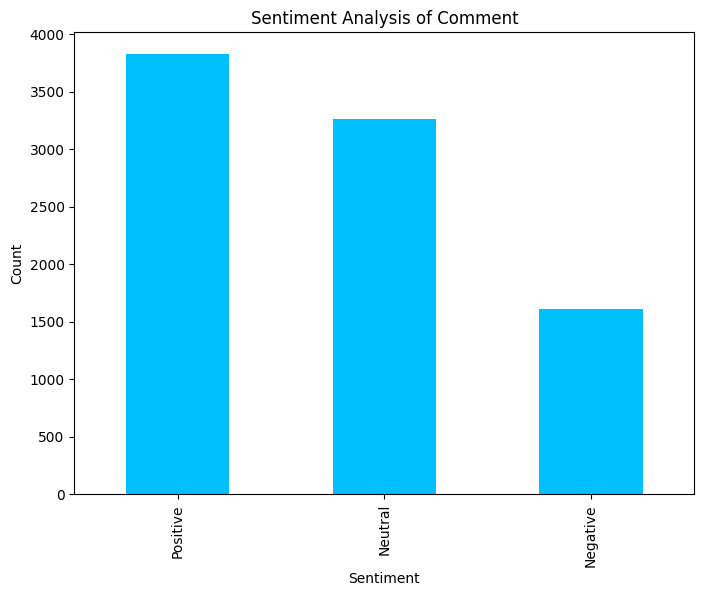

In [ ]:
#visualize sentiment
plt.figure(figsize = (8,6))
plt.xlabel('Sentiment')
plt.ylabel('Count')
df2['Sentiment'].value_counts().plot(kind = 'bar', color = 'deepskyblue')
plt.title("Sentiment Analysis of Comment")
plt.show()

In [ ]:
#selection data
join = (df2['Comment_Clean'], df2['Sentiment'])
df3 = pd.concat(join, axis = True)
df3.head()

,Comment_Clean,Sentiment
0,A few things You might have negative frequency...,Positive
1,Is it so hard to believe that there exist part...,Negative
2,There are bees,Neutral
3,Im a medication technician And thats alot of d...,Positive
4,Cesium is such a pretty metal,Positive


In [ ]:
#transform data to categorical variable
df3['Sentiment'] = df3['Sentiment'].astype('category')
print(df3.dtypes)

Comment_Clean      object
Sentiment        category
dtype: object


In [ ]:
#handling categorical data
df3['Sentiment'] = df3['Sentiment'].cat.codes
df3.head()

,Comment_Clean,Sentiment
0,A few things You might have negative frequency...,2
1,Is it so hard to believe that there exist part...,0
2,There are bees,1
3,Im a medication technician And thats alot of d...,2
4,Cesium is such a pretty metal,2


In [ ]:
X = df3.drop('Sentiment', axis = 1)
y = df3['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6086, 1)
(6086,)
(2609, 1)
(2609,)


In [ ]:
def vectorize(data, tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names_out()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=words)
    return X_tfidf_df

# Applying feature scaling
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf_vect_fit = tfidf_vect.fit(X_train['Comment_Clean'])
X_train_transformed = vectorize(X_train['Comment_Clean'], tfidf_vect_fit)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

# Assuming X_train and y_train are already defined
# Build vectorizer and transform your text data
tfidf_vect = TfidfVectorizer()
X_train_transformed = tfidf_vect.fit_transform(X_train['Comment_Clean'])

# Build and train the model
rf = RandomForestClassifier()
rf.fit(X_train_transformed, y_train.values.ravel())

# Evaluate using cross-validation
score = cross_val_score(rf, X_train_transformed, y_train.values.ravel(), cv=5)
print(score)
print(score.mean())


[0.73070608 0.72062449 0.72391126 0.71815941 0.73130649]
0.724941543783807


In [ ]:
#prediction
X_test = vectorize(X_test['Comment_Clean'], tfidf_vect_fit)
y_pred = rf.predict(X_test)
print(y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


[1 2 1 ... 0 2 2]


In [ ]:
#report of MSE, MAE, RMSE
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error : '+ str(mae))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.5461862782675354
Mean Absolute Error : 0.35530854733614414
Root Mean Squared Error : 0.7390441653024097


[[  81  137  246]
 [   0  838  107]
 [   3  185 1012]]


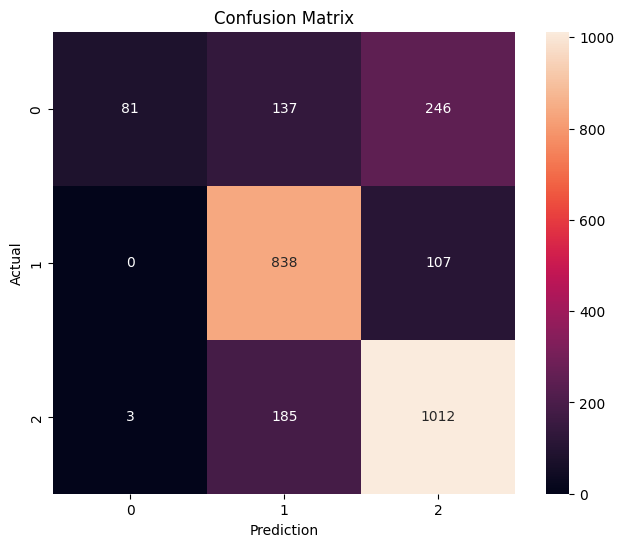

In [ ]:
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = '.0f', square = True)
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.17      0.30       464
           1       0.72      0.89      0.80       945
           2       0.74      0.84      0.79      1200

    accuracy                           0.74      2609
   macro avg       0.81      0.63      0.63      2609
weighted avg       0.77      0.74      0.70      2609



In [ ]:
# Transforming X_train to DataFrame after vectorization
X_train_transformed_df = pd.DataFrame(X_train_transformed.toarray(), columns=tfidf_vect.get_feature_names_out())

# Defining feature importance
feature = pd.Series(rf.feature_importances_, index=X_train_transformed_df.columns).sort_values(ascending=False)
print(feature)


thanks         0.014833
to             0.013088
the            0.012721
and            0.010466
is             0.010255
                 ...   
dissipate      0.000000
dissipates     0.000000
dissipating    0.000000
puedes         0.000000
lefttoright    0.000000
Length: 16696, dtype: float64


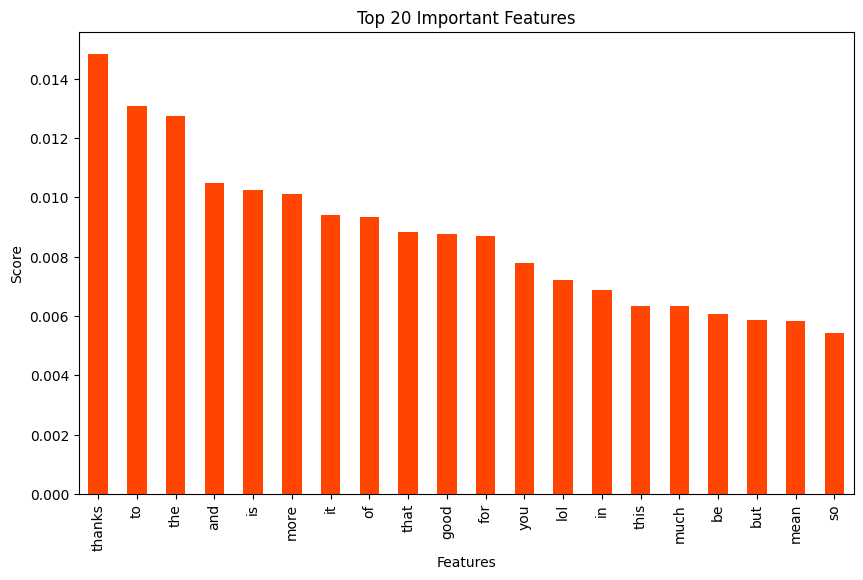

In [ ]:
#visualize feature
feature.nlargest(20).plot(kind = 'bar',figsize = (10,6), color = 'orangered')
plt.title("Top 20 Important Features")
plt.xlabel("Features")
plt.ylabel("Score")
plt.show()

<ipython-input-85-3644c4bf5900>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(txt['Topic'], palette = 'Set1')


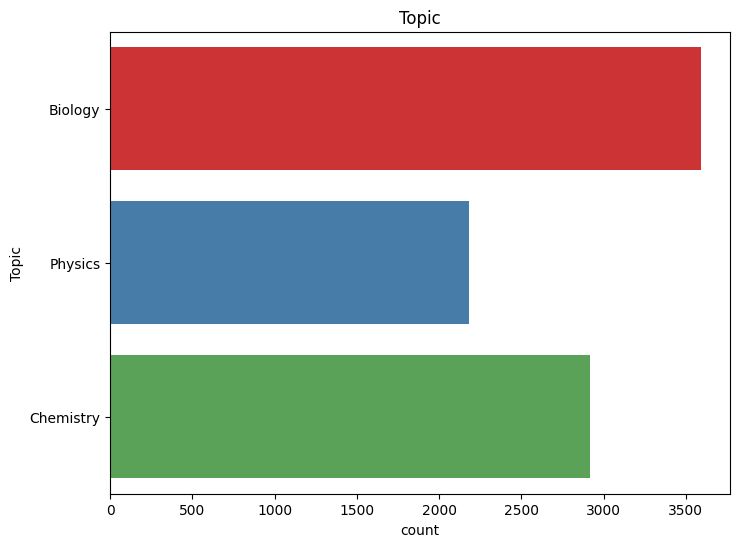

In [ ]:
#visualize topic
plt.figure(figsize = (8,6))
sns.countplot(txt['Topic'], palette = 'Set1')
plt.title("Topic")
plt.show()

In [ ]:
#selection data
join = (txt['Topic'], df2['Sentiment'])
df4 = pd.concat(join, axis = True)
df4.head()

,Topic,Sentiment
0,Biology,Positive
1,Physics,Negative
2,Biology,Neutral
3,Biology,Positive
4,Chemistry,Positive


In [ ]:
#group topic & sentiment
topic_sentiment = df4.groupby(['Topic', 'Sentiment']).size().reset_index(name = 'Count')
print(topic_sentiment)

       Topic Sentiment  Count
0    Biology  Negative    741
1    Biology   Neutral   1350
2    Biology  Positive   1500
3  Chemistry  Negative    525
4  Chemistry   Neutral   1076
5  Chemistry  Positive   1319
6    Physics  Negative    345
7    Physics   Neutral    833
8    Physics  Positive   1006


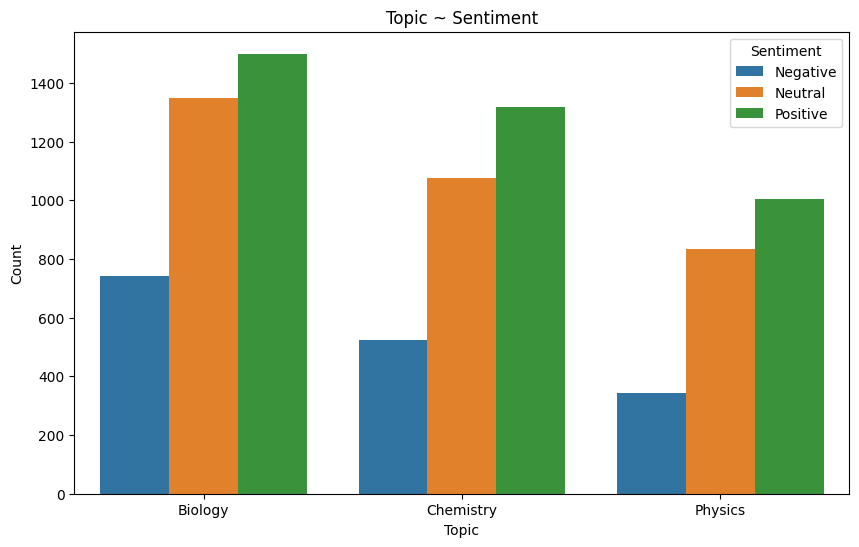

In [ ]:
#visualize topic ~ sentiment
plt.figure(figsize = (10,6))
sns.barplot(x = 'Topic', y = 'Count', hue = 'Sentiment', data = topic_sentiment)
plt.title("Topic ~ Sentiment")
plt.show()